In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
data = pd.merge(transactions, customers, on='CustomerID', how='inner')

In [7]:
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'max'],  
    'TransactionID': 'count',             
    'Quantity': 'sum'                     
}).reset_index()

In [9]:
customer_features.columns = ['CustomerID', 'TotalSpending', 'AvgTransactionValue', 'MaxTransactionValue', 'TransactionCount', 'TotalQuantity']
final_data = pd.merge(customer_features, customers, on='CustomerID', how='inner')

In [11]:
encoder = LabelEncoder()
final_data['Region'] = encoder.fit_transform(final_data['Region'])
features = final_data[['TotalSpending', 'AvgTransactionValue', 'MaxTransactionValue', 'TransactionCount', 'TotalQuantity', 'Region']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)
final_data['KMeansCluster'] = kmeans_clusters
kmeans_db_index = davies_bouldin_score(scaled_features, kmeans_clusters)
kmeans_silhouette = silhouette_score(scaled_features, kmeans_clusters)
print(f"K-Means Davies-Bouldin Index: {kmeans_db_index}")
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Davies-Bouldin Index: 1.2834139885505662
K-Means Silhouette Score: 0.24344993031873152


C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


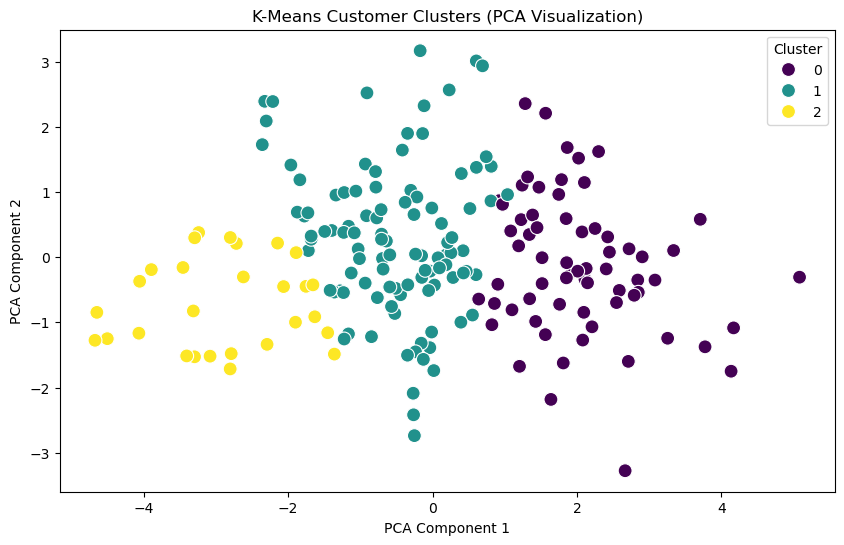

In [15]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=final_data['KMeansCluster'], 
                palette='viridis', s=100)
plt.title('K-Means Customer Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()